In [3]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from skimage.color import rgb2hed, hed2rgb

In [4]:
X = np.load("/content/drive/MyDrive/A2/images.npy")#read images 
Y = pd.read_csv('/content/drive/MyDrive/A2/counts.csv')#read cell counts  
F = np.loadtxt('/content/drive/MyDrive/A2/split.txt')#read fold information

print("Number of images available in images.npy is: " + str(len(X)))


Number of images available in images.npy is: 4981


In [5]:
df = pd.DataFrame(F)
df.value_counts()

2.0    1751
1.0    1622
3.0    1608
dtype: int64

In [6]:
df = df.rename(columns={0:'fold'})

i. The folds, 1,2 and 3 have have 1622, 1751 and 1608 samples each

ii. 5 images are displayed below, 

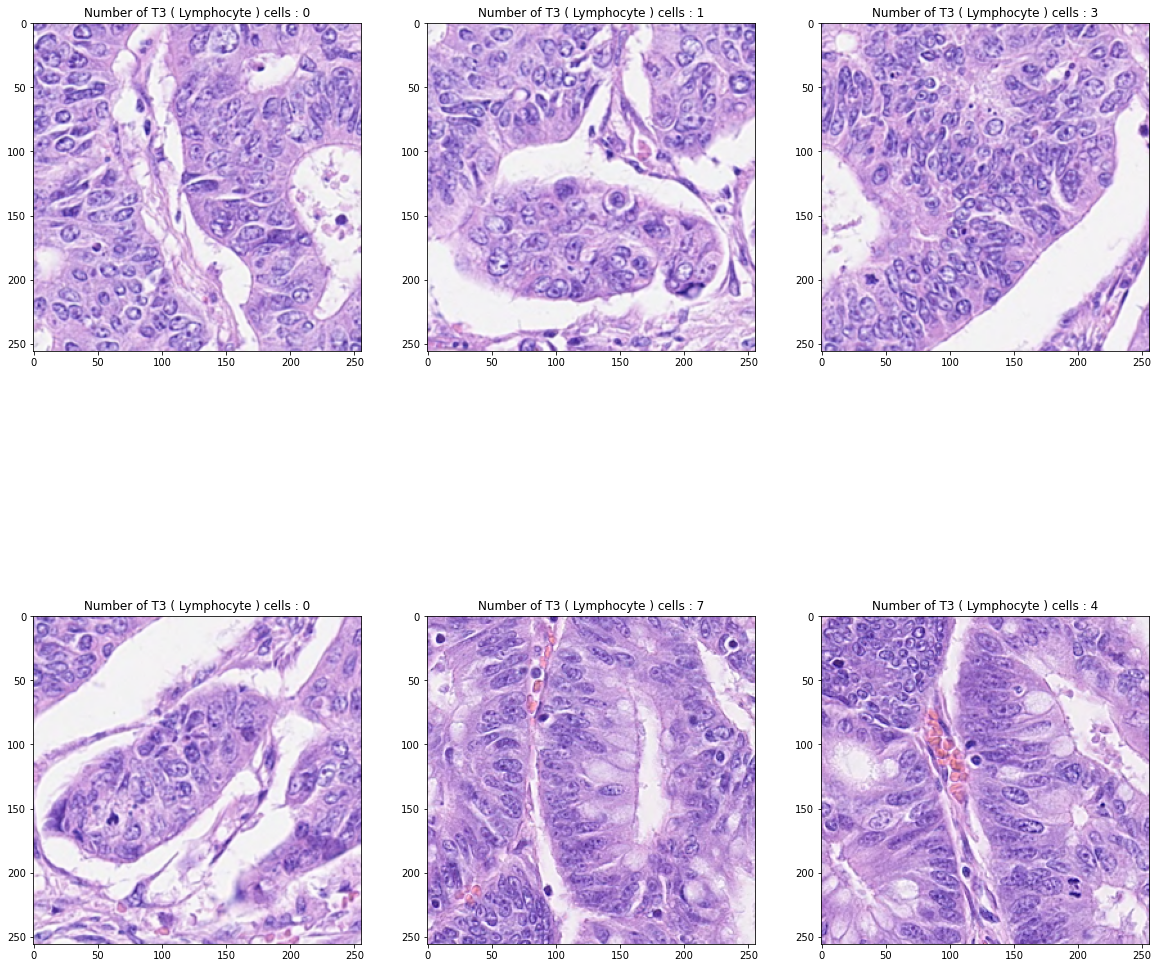

In [7]:
plt.figure(figsize=(20, 20))
columns = 3
rows = 2
for i in range(0,6) :
    plt.subplot(rows,columns,i+1)
    plt.title("Number of T3 ( Lymphocyte ) cells : " + str(Y.loc[i,'lymphocyte']))
    plt.imshow(X[i,:], cmap='gray')
plt.show()

iii. Histogram of counts for each cell type

In [8]:
X_1_indices = df.index[df['fold'] == 1].tolist()
X_2_indices = df.index[df['fold'] == 2].tolist()
X_3_indices = df.index[df['fold'] == 3].tolist()
X_1 = X[X_1_indices]
X_2 = X[X_2_indices]
X_3 = X[X_3_indices]
Y_1 = Y.loc[X_1_indices]
Y_2 = Y.loc[X_2_indices]
Y_3 = Y.loc[X_3_indices]
print(X_1.shape,X_2.shape,X_3.shape)

(1622, 256, 256, 3) (1751, 256, 256, 3) (1608, 256, 256, 3)


### Fold 1 Histogram of cell types

[1.308e+03 2.180e+02 1.700e+01 4.000e+01 2.800e+01 7.000e+00 3.000e+00
 1.000e+00]
[223.  31.   4.  46.  82. 127. 176. 205.]
[166. 327.  70. 216. 293. 209.  99.  84.]
[527. 455.  53. 267. 222.  64.  22.  10.]
[1.179e+03 4.080e+02 9.000e+00 2.500e+01 1.000e+00 0.000e+00 0.000e+00
 0.000e+00]


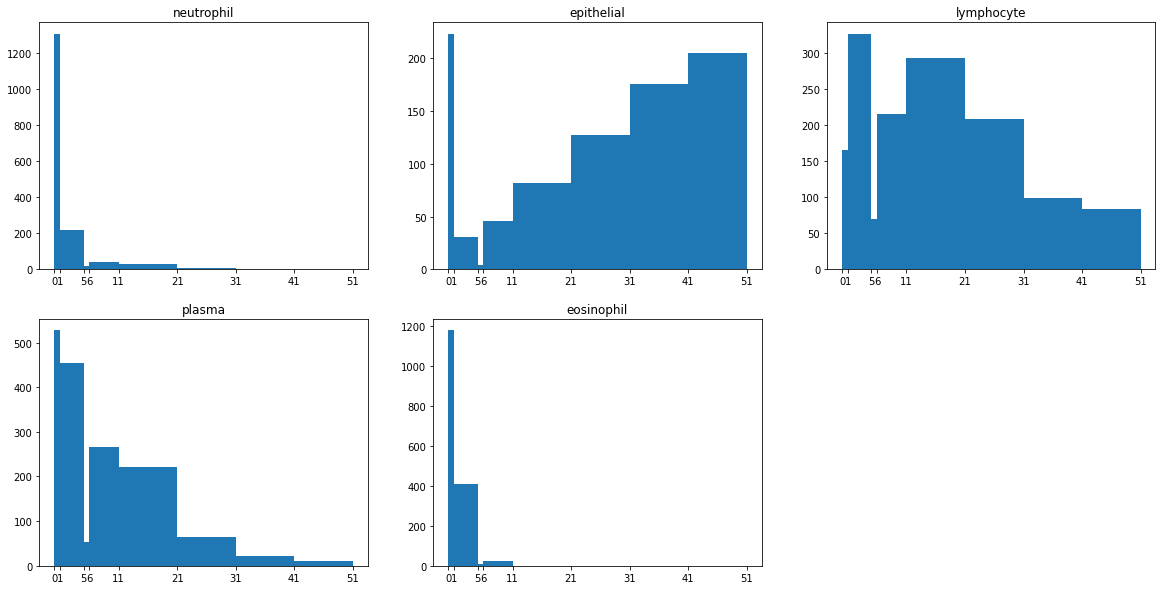

In [10]:
columns = 3
rows = 2
plt.figure(figsize=(20, 10))
bins=[0,1,5,6,11,21,31,41,51]
for i in range(1,6):
    plt.subplot(rows,columns,i)
    ax = plt.hist(Y_1[Y_1.columns[i-1]], bins=bins)
    print(ax[0])
    plt.title(str(Y_1.columns[i-1]))
    plt.xticks(bins)
plt.show()

### Fold 2 Histogram of cell types

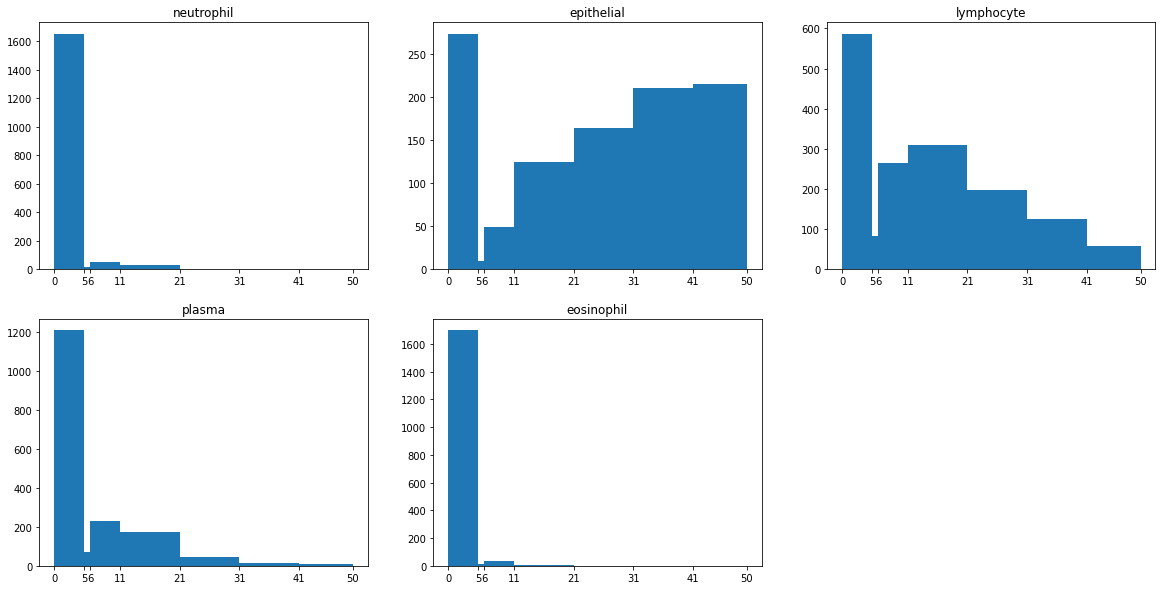

In [11]:
columns = 3
rows = 2
plt.figure(figsize=(20, 10))
bins=[0,5,6,11,21,31,41,50]
for i in range(1,6):
    plt.subplot(rows,columns,i)
    ax = plt.hist(Y_2[Y_2.columns[i-1]], bins=bins)
    plt.title(str(Y_2.columns[i-1]))
    plt.xticks(bins)
plt.show()

### Fold 3 Histogram of cell types

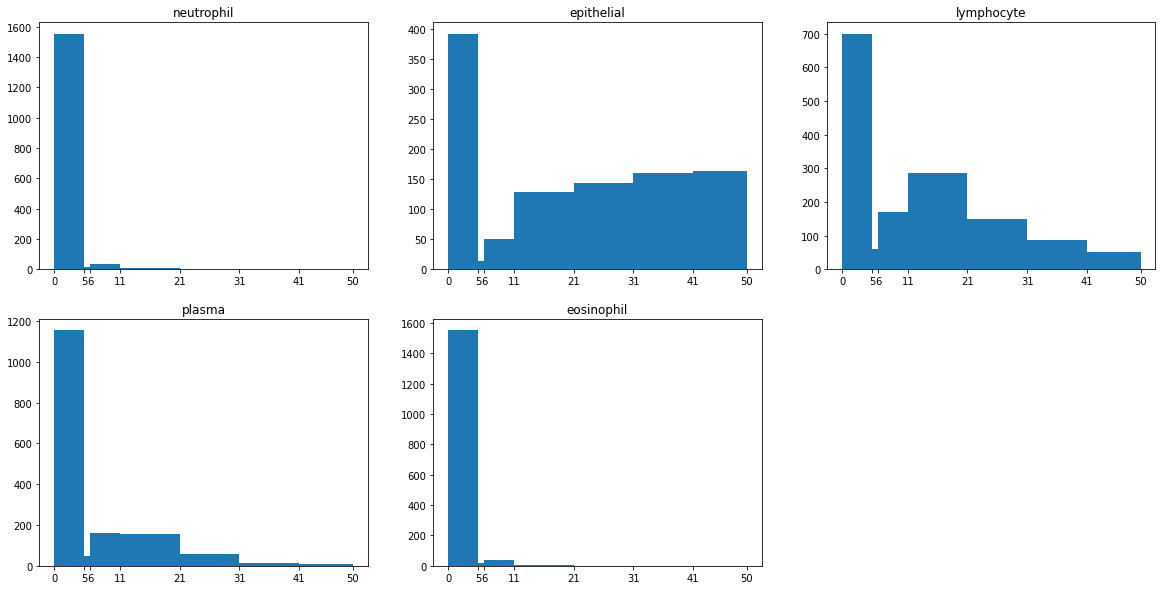

In [12]:
columns = 3
rows = 2
plt.figure(figsize=(20, 10))
bins=[0,5,6,11,21,31,41,50]
for i in range(1,6):
    plt.subplot(rows,columns,i)
    ax = plt.hist(Y_3[Y_1.columns[i-1]], bins=bins)
    plt.title(str(Y_3.columns[i-1]))
    plt.xticks(bins)
plt.show()

iv. RGB to HED conversion

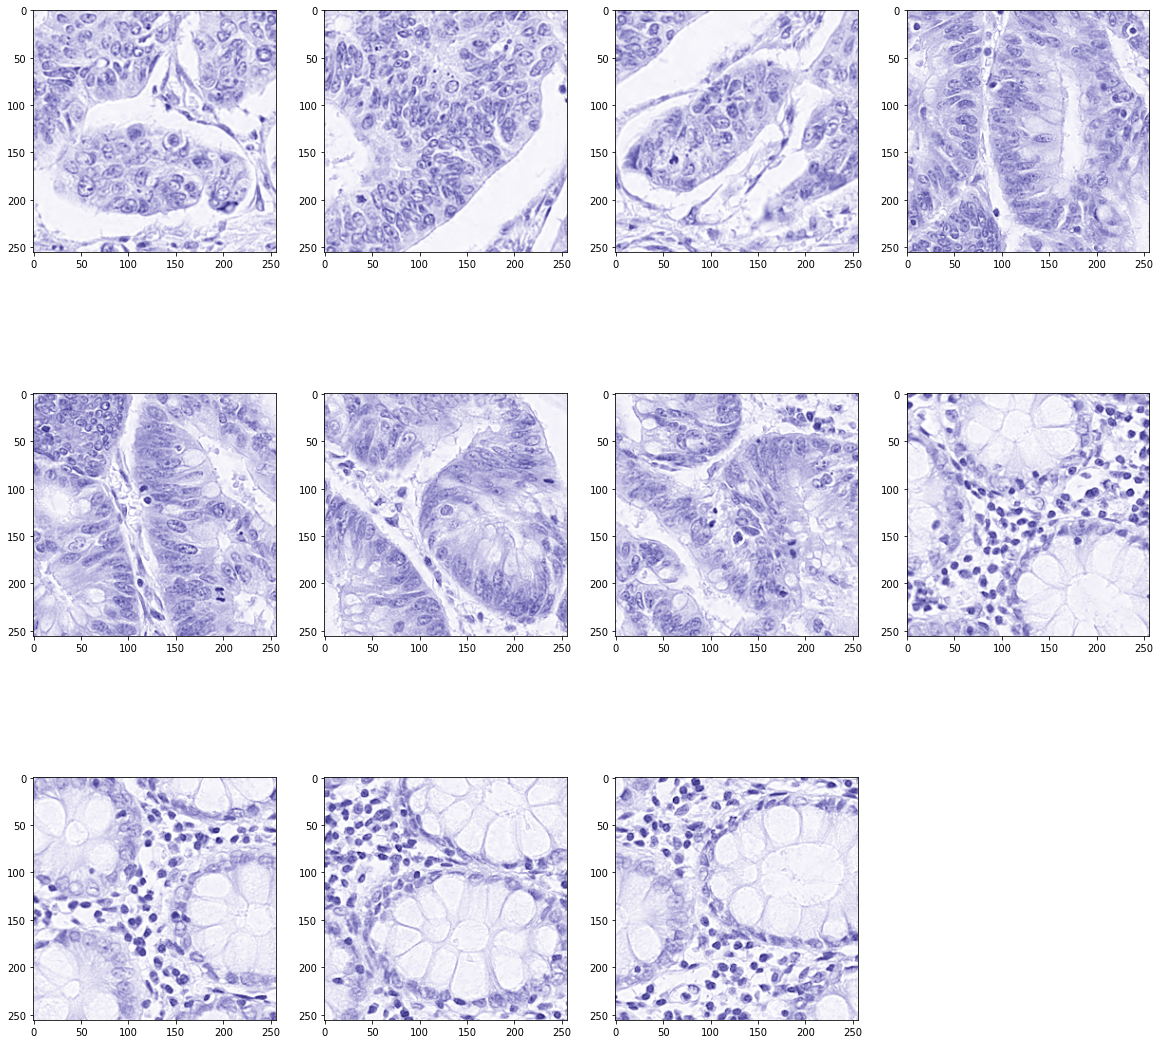

In [14]:
plt.figure(figsize=(20, 20))
columns = 4
rows = 3
for i in range(1,12) :
    plt.subplot(rows,columns,i)
    im_hed = rgb2hed(X[i,:])
    null = np.zeros_like(im_hed[:, :, 0])
    ihc_h = hed2rgb(np.stack((im_hed[:, :, 0], null, null), axis=-1))
    plt.imshow(ihc_h)


v. Average of H channel vs Cell count

In [9]:
average_h_fold_1 = []
for image in X_1 :
    image_hed = rgb2hed(image)
    null = np.zeros_like(image_hed[:, :, 0])
    # ihc_h = hed2rgb(np.stack((image_hed[:, :, 0], null, null), axis=-1))
    average_h_fold_1.append(np.mean(image_hed[:,:,0]))

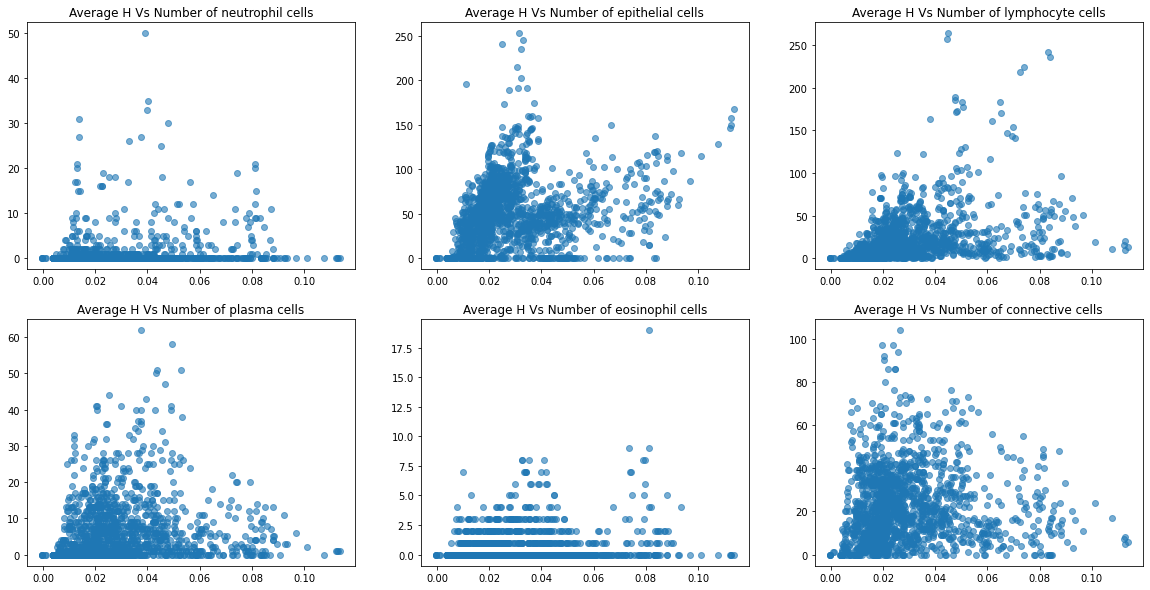

In [10]:
Y_1 = Y[Y.index.isin(X_1_indices)]

plt.figure(figsize=(20, 10))
columns = 3
rows = 2
for i in range(0,6) :
    plt.subplot(rows,columns,i+1)
    plt.title("Average H Vs Number of " + Y_1.columns[i] + " cells")
    plt.scatter(average_h_fold_1,Y_1[Y_1.columns[i]],alpha=0.6)
plt.show()



Average of the H channel when plotted ona scatter plot with the count of each of the cells, seem to have a fair correlation with some of the cell values. Therefore, this can be a good feature to be added to our model for training

Being a regression problem, evaluation metrics such as R2 score, Root Mean Square Error, Pearson and Pearman Correlation Coefficients can be used. 

As a performance metric to be used to evaluating the fit of various models, I believe R2 is the best choice as it gives information about how well the model is fitting the data. An R2 score close to 1 means that the predicted variable can be completely explained by all other independent variables without any error.

In [11]:
from scipy.stats import entropy

Feature Extraction from the images
a . Average of the H, R, G and B channels
b. Variance of the H, R, G and B channels
c. Entropy of the H, R, G and B channels
d. Any other features using PCA

In [12]:
average_h = []
average_r = []
average_g = []
average_b = []
variance_h = []
variance_r = []
variance_g = []
variance_b = []
entropy_h = []
entropy_r = []
entropy_g = []
entropy_b = []

In [13]:
for image in X :
    image_hed = rgb2hed(image)
    null = np.zeros_like(image_hed[:, :, 0])
    ihc_h = image_hed[:, :, 0]
    average_h.append(np.mean(ihc_h))
    average_r.append(np.mean(image[:,:,0]))
    average_g.append(np.mean(image[:,:,1]))
    average_b.append(np.mean(image[:,:,2]))
    variance_h.append(np.var(ihc_h))
    variance_r.append(np.var(image[:,:,0]))
    variance_g.append(np.var(image[:,:,1]))
    variance_b.append(np.var(image[:,:,2]))
    value,counts = np.unique(ihc_h, return_counts=True)
    entropy_h.append(entropy(counts, base = 2))
    value,counts = np.unique(image[:,:,0], return_counts=True)
    entropy_r.append(entropy(counts, base = 2))
    value,counts = np.unique(image[:,:,1], return_counts=True)
    entropy_g.append(entropy(counts, base= 2 ))
    value,counts = np.unique(image[:,:,2], return_counts=True)
    entropy_b.append(entropy(counts))
    

### GLCM Feature extraction
The images we have in this regression problem is a histopathology image. These images have very little easily discernible visual differences especially between cancerous and non cancerous tissues. Texture analysis has a proved track record as being an excellent tool for image quantification when it comes to such images with subtle differences. GLCM is a popular method to identify features relating to texture in images

In [31]:
from skimage.feature import greycomatrix, greycoprops

In [32]:
glcm_features = pd.DataFrame()
im_glcm = pd.DataFrame()
for img in X :
  image_hed = rgb2hed(img/255.0)
  ihc_h = (image_hed[:, :, 0] * 255.0).astype(np.uint8)
  GLCM = greycomatrix(ihc_h, [10], [0])       
  GLCM_Energy = greycoprops(GLCM, 'energy')[0]
  im_glcm['Energy1_0'] = GLCM_Energy
  GLCM_corr = greycoprops(GLCM, 'correlation')[0]
  im_glcm['Corr1_0'] = GLCM_corr       
  GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0]
  im_glcm['Diss_sim1_0'] = GLCM_diss       
  GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
  im_glcm['Homogen1_0'] = GLCM_hom       
  GLCM_contr = greycoprops(GLCM, 'contrast')[0]
  im_glcm['Contrast1_0'] = GLCM_contr

  GLCM = greycomatrix(ihc_h, [5], [0])       
  GLCM_Energy = greycoprops(GLCM, 'energy')[0]
  im_glcm['Energy5_0'] = GLCM_Energy
  GLCM_corr = greycoprops(GLCM, 'correlation')[0]
  im_glcm['Corr5_0'] = GLCM_corr       
  GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0]
  im_glcm['Diss_sim5_0'] = GLCM_diss       
  GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
  im_glcm['Homogen5_0'] = GLCM_hom       
  GLCM_contr = greycoprops(GLCM, 'contrast')[0]
  im_glcm['Contrast5_0'] = GLCM_contr

  GLCM = greycomatrix(ihc_h, [7], [0])       
  GLCM_Energy = greycoprops(GLCM, 'energy')[0]
  im_glcm['Energy1_90'] = GLCM_Energy
  GLCM_corr = greycoprops(GLCM, 'correlation')[0]
  im_glcm['Corr1_90'] = GLCM_corr       
  GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0]
  im_glcm['Diss_sim1_90'] = GLCM_diss       
  GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
  im_glcm['Homogen1_90'] = GLCM_hom       
  GLCM_contr = greycoprops(GLCM, 'contrast')[0]
  im_glcm['Contrast1_90'] = GLCM_contr

  GLCM = greycomatrix(ihc_h, [5], [np.pi/2])       
  GLCM_Energy = greycoprops(GLCM, 'energy')[0]
  im_glcm['Energy5_90'] = GLCM_Energy
  GLCM_corr = greycoprops(GLCM, 'correlation')[0]
  im_glcm['Corr5_90'] = GLCM_corr       
  GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0]
  im_glcm['Diss_sim5_90'] = GLCM_diss       
  GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
  im_glcm['Homogen5_90'] = GLCM_hom       
  GLCM_contr = greycoprops(GLCM, 'contrast')[0]
  im_glcm['Contrast5_90'] = GLCM_contr

  glcm_features = glcm_features.append(im_glcm)





In [33]:
glcm_features.isna().value_counts()

Energy1_0  Corr1_0  Diss_sim1_0  Homogen1_0  Contrast1_0  Energy5_0  Corr5_0  Diss_sim5_0  Homogen5_0  Contrast5_0  Energy1_90  Corr1_90  Diss_sim1_90  Homogen1_90  Contrast1_90  Energy5_90  Corr5_90  Diss_sim5_90  Homogen5_90  Contrast5_90
False      False    False        False       False        False      False    False        False       False        False       False     False         False        False         False       False     False         False        False           4981
dtype: int64

In [34]:
glcm_features.head(20)

Energy1_0   Corr1_0  Diss_sim1_0  Homogen1_0  Contrast1_0  Energy5_0  \
0   0.068622  0.188100     5.292334    0.210156    54.025502   0.075670   
0   0.094364  0.214885     5.043636    0.262560    54.587335   0.104582   
0   0.089115  0.277170     5.248825    0.251116    55.231803   0.100009   
0   0.111883  0.263487     4.740854    0.279308    48.208206   0.126369   
0   0.059658  0.066574     5.722386    0.193317   184.395436   0.065442   
0   0.058328  0.071134     6.315247    0.198189   313.898707   0.063376   
0   0.066093  0.093868     5.160410    0.223032   138.102515   0.074904   
0   0.066472  0.260151     5.029757    0.215676    49.864456   0.073491   
0   0.117239  0.146402     5.924209    0.284453    90.144325   0.128764   
0   0.108811  0.130413     5.473228    0.287814    81.525343   0.119917   
0   0.123927  0.188578     5.417826    0.290239    77.507670   0.134764   
0   0.116127  0.118724     5.947154    0.284348    94.926258   0.128461   
0   0.409765  0.077254     1.475102    0.650024    16.833556   0.424310   
0   0.217186  0.056636     2.955650    0.431688    43.866155   0.225423   
0   0.149722 -0.020234     3.663999    0.322035    39.129256   0.153087   
0   0.167987  0.009445     3.493204    0.344351    69.991044   0.172117   
0   0.084949  0.144589     4.918143    0.249769    54.317788   0.093703   
0   0.085227  0.185178     4.901899    0.251552    52.104992   0.092798   
0   0.101380  0.196284     4.697599    0.276612    51.284934   0.113182   
0   0.069123  0.074422     5.894357    0.210742    71.402137   0.076855   

    Corr5_0  Diss_sim5_0  Homogen5_0  Contrast5_0  Energy1_90  Corr1_90  \
0  0.327590     4.640143    0.250309    44.827207    0.072099  0.259551   
0  0.341592     4.446558    0.299288    45.653573    0.099501  0.277722   
0  0.392366     4.634026    0.287023    46.290494    0.095353  0.338115   
0  0.448111     3.950666    0.328160    36.054750    0.119797  0.352809   
0  0.112789     4.893006    0.242298   173.190286    0.062265  0.087087   
0  0.123166     5.534409    0.238127   291.554236    0.060477  0.105481   
0  0.186605     4.366970    0.268911   122.575293    0.070308  0.134562   
0  0.428301     4.251214    0.259808    38.286043    0.069806  0.336610   
0  0.327022     5.011454    0.327153    71.376899    0.123360  0.199256   
0  0.345045     4.543654    0.330218    60.886127    0.113998  0.195203   
0  0.390719     4.546206    0.331711    58.732336    0.129391  0.264363   
0  0.355969     4.861927    0.327814    69.218065    0.121912  0.206515   
0  0.329828     1.230702    0.694822    12.543451    0.415545  0.193828   
0  0.168098     2.681135    0.457351    38.659534    0.221049  0.101297   
0  0.076123     3.434932    0.341891    35.511843    0.150828  0.004085   
0  0.109743     3.213739    0.363057    62.254326    0.170398  0.037259   
0  0.357162     4.073814    0.297349    40.681073    0.089585  0.246492   
0  0.335897     4.254949    0.290922    42.284861    0.088557  0.235766   
0  0.387392     3.968439    0.325734    39.467163    0.106977  0.277789   
0  0.309706     4.885365    0.255947    53.121545    0.072535  0.180156   

   Diss_sim1_90  Homogen1_90  Contrast1_90  Energy5_90  Corr5_90  \
0      4.955980     0.231250     49.301613    0.078295  0.319033   
0      4.752902     0.278798     50.157081    0.103019  0.336715   
0      4.919585     0.269155     50.454223    0.103061  0.415914   
0      4.355986     0.303567     42.289157    0.122210  0.428955   
0      5.297252     0.217869    179.085812    0.068468  0.153298   
0      5.921357     0.216170    299.319795    0.064162  0.147176   
0      4.782756     0.244686    131.002008    0.076674  0.193418   
0      4.650147     0.236895     44.545479    0.071688  0.364419   
0      5.592934     0.306676     84.783478    0.127696  0.282504   
0      5.133079     0.306089     75.035250    0.118318  0.278909   
0      5.077576     0.310017     70.694230    0.133646  0.318129   
0      5.510997     0.304195     85

In [35]:
x = pd.DataFrame()
x = x.append(glcm_features)
x['a_h'] = average_h
x['a_r'] = average_r
x['a_g'] = average_g
x['a_b'] = average_b
x['v_h'] = variance_h
x['v_r'] = variance_r
x['v_g'] = variance_g
x['v_b'] = variance_b
x['e_h'] = entropy_h
x['e_r'] = entropy_r
x['e_g'] = entropy_g
x['e_b'] = entropy_b

In [36]:
x.head(20)

Energy1_0   Corr1_0  Diss_sim1_0  Homogen1_0  Contrast1_0  Energy5_0  \
0   0.068622  0.188100     5.292334    0.210156    54.025502   0.075670   
0   0.094364  0.214885     5.043636    0.262560    54.587335   0.104582   
0   0.089115  0.277170     5.248825    0.251116    55.231803   0.100009   
0   0.111883  0.263487     4.740854    0.279308    48.208206   0.126369   
0   0.059658  0.066574     5.722386    0.193317   184.395436   0.065442   
0   0.058328  0.071134     6.315247    0.198189   313.898707   0.063376   
0   0.066093  0.093868     5.160410    0.223032   138.102515   0.074904   
0   0.066472  0.260151     5.029757    0.215676    49.864456   0.073491   
0   0.117239  0.146402     5.924209    0.284453    90.144325   0.128764   
0   0.108811  0.130413     5.473228    0.287814    81.525343   0.119917   
0   0.123927  0.188578     5.417826    0.290239    77.507670   0.134764   
0   0.116127  0.118724     5.947154    0.284348    94.926258   0.128461   
0   0.409765  0.077254     1.475102    0.650024    16.833556   0.424310   
0   0.217186  0.056636     2.955650    0.431688    43.866155   0.225423   
0   0.149722 -0.020234     3.663999    0.322035    39.129256   0.153087   
0   0.167987  0.009445     3.493204    0.344351    69.991044   0.172117   
0   0.084949  0.144589     4.918143    0.249769    54.317788   0.093703   
0   0.085227  0.185178     4.901899    0.251552    52.104992   0.092798   
0   0.101380  0.196284     4.697599    0.276612    51.284934   0.113182   
0   0.069123  0.074422     5.894357    0.210742    71.402137   0.076855   

    Corr5_0  Diss_sim5_0  Homogen5_0  Contrast5_0  ...         a_g  \
0  0.327590     4.640143    0.250309    44.827207  ...  170.029984   
0  0.341592     4.446558    0.299288    45.653573  ...  176.373886   
0  0.392366     4.634026    0.287023    46.290494  ...  170.161255   
0  0.448111     3.950666    0.328160    36.054750  ...  180.647141   
0  0.112789     4.893006    0.242298   173.190286  ...  154.436249   
0  0.123166     5.534409    0.238127   291.554236  ...  154.021591   
0  0.186605     4.366970    0.268911   122.575293  ...  164.561646   
0  0.428301     4.251214    0.259808    38.286043  ...  164.091385   
0  0.327022     5.011454    0.327153    71.376899  ...  184.875824   
0  0.345045     4.543654    0.330218    60.886127  ...  185.100433   
0  0.390719     4.546206    0.331711    58.732336  ...  185.087158   
0  0.355969     4.861927    0.327814    69.218065  ...  185.582062   
0  0.329828     1.230702    0.694822    12.543451  ...  232.172241   
0  0.168098     2.681135    0.457351    38.659534  ...  208.656540   
0  0.076123     3.434932    0.341891    35.511843  ...  193.096527   
0  0.109743     3.213739    0.363057    62.254326  ...  197.826996   
0  0.357162     4.073814    0.297349    40.681073  ...  177.307449   
0  0.335897     4.254949    0.290922    42.284861  ...  178.273666   
0  0.387392     3.968439    0.325734    39.467163  ...  182.134018   
0  0.309706     4.885365    0.255947    53.121545  ...  171.543610   

          a_b       v_h          v_r          v_g         v_b        e_h  \
0  220.461472  0.000512  1331.335242  1876.016023  481.998760  15.118937   
0  222.857880  0.000533  1417.460078  2178.975367  509.681401  14.800732   
0  220.063202  0.000586  1539.463942  2307.646238  535.724338  14.575099   
0  223.980301  0.000505  1436.195576  2438.515856  513.623590  14.493204   
0  214.194946  0.000476  1233.496379  1642.879389  537.033895  15.173962   
0  213.763138  0.000563  1366.683386  1779.725074  588.483401  15.247895   
0  217.269119  0.000475  1307.347645  1889.764022  538.694314  15.124046   
0  217.301147  0.000515  1363.587796  1931.256648  570.682198  15.195783   
0  224.842209  0.000829  1839.936612  2446.205283  626.756917  14.795950   
0  225.652267  0.000720  1629.208248  2183.667281  564.271859  14.839395   
0  225.660431  0.000751  1736.266319  2471.731112  615.098102  14.723650   
0  225.356155  0.000828  1815.437105  2456.5

In [37]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4981 entries, 0 to 0
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Energy1_0     4981 non-null   float64
 1   Corr1_0       4981 non-null   float64
 2   Diss_sim1_0   4981 non-null   float64
 3   Homogen1_0    4981 non-null   float64
 4   Contrast1_0   4981 non-null   float64
 5   Energy5_0     4981 non-null   float64
 6   Corr5_0       4981 non-null   float64
 7   Diss_sim5_0   4981 non-null   float64
 8   Homogen5_0    4981 non-null   float64
 9   Contrast5_0   4981 non-null   float64
 10  Energy1_90    4981 non-null   float64
 11  Corr1_90      4981 non-null   float64
 12  Diss_sim1_90  4981 non-null   float64
 13  Homogen1_90   4981 non-null   float64
 14  Contrast1_90  4981 non-null   float64
 15  Energy5_90    4981 non-null   float64
 16  Corr5_90      4981 non-null   float64
 17  Diss_sim5_90  4981 non-null   float64
 18  Homogen5_90   4981 non-null   f

### Note 
PCA was tried with the data using 2 principal components. The scatter plots and the model performance with these features indicated that these features did not add information to the model.

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.decomposition import IncrementalPCA

In [ ]:
# randomized_pca = PCA(n_components= 2 ,svd_solver='randomized')
# incremental_pca = IncrementalPCA(n_components=2)

In [ ]:
# x.head()

In [ ]:
# X_randomized_pca = randomized_pca.fit_transform(x)
# X_incremental_pca = incremental_pca.fit_transform(x)


In [ ]:
# X_randomized_pca.shape

In [ ]:
# x['pc1'] = X_randomized_pca[:,0]
# x['pc2'] = X_randomized_pca[:,1]
# x['pc1_incr'] = X_incremental_pca[:,0]
# x['pc2_incr'] = X_incremental_pca[:,1]


In [ ]:
# x

In [ ]:
# len(x.columns)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from scipy.stats import pearsonr
from scipy.stats import spearmanr

Energy1_0 : -0.2978764457304482
Corr1_0 : -0.1814298957262425
Diss_sim1_0 : 0.2615900146611306
Homogen1_0 : -0.3991728537764694
Contrast1_0 : 0.05685987751151852
Energy5_0 : -0.2990713566846612
Corr5_0 : -0.07929046866511666
Diss_sim5_0 : 0.23972645793651123
Homogen5_0 : -0.4087922660521884
Contrast5_0 : 0.05496461601794834
Energy1_90 : -0.29973376126903034
Corr1_90 : -0.15643324973029046
Diss_sim1_90 : 0.2611795903258824
Homogen1_90 : -0.4073757073057228
Contrast1_90 : 0.05732275265365879
Energy5_90 : -0.2988656728978601
Corr5_90 : -0.0951606387799372
Diss_sim5_90 : 0.2354446107783711
Homogen5_90 : -0.40734810010558387
Contrast5_90 : 0.05374647932202547
a_h : 0.3304252284863314
a_r : -0.36046827562410544
a_g : -0.38567031837731586
a_b : -0.37574599037357703
v_h : 0.43991358744700904
v_r : 0.40163870998506573
v_g : 0.12884761376222903
v_b : 0.24206174107786
e_h : 0.2072629768558267
e_r : 0.3203661257505517
e_g : 0.2157461827837762
e_b : 0.28792081646178264


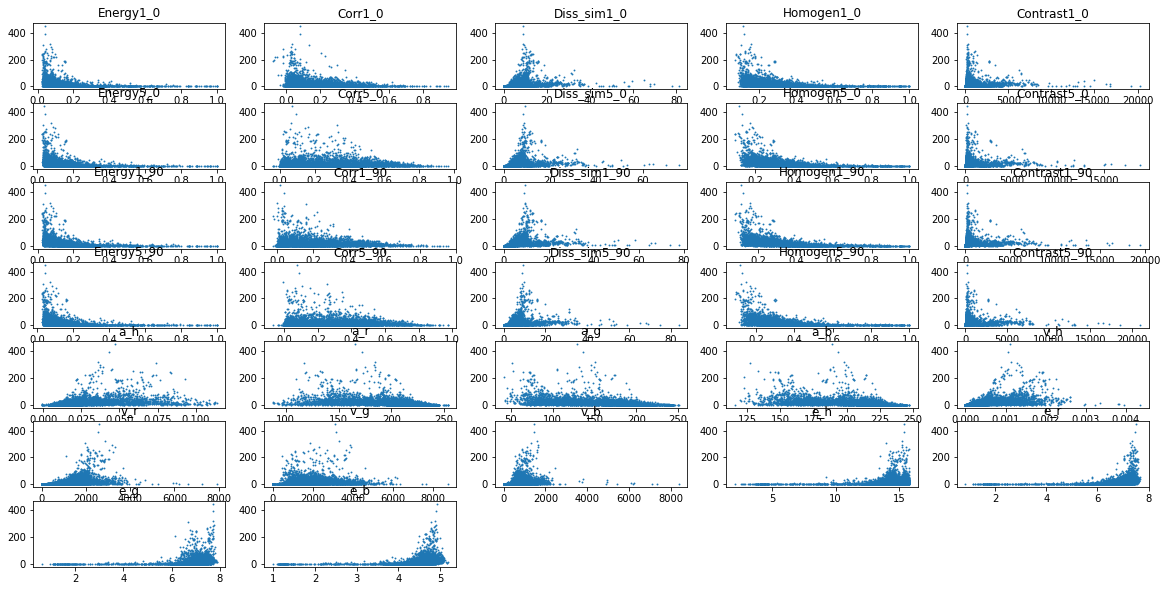

In [44]:
plt.figure(figsize=(20, 10))
columns = 5
rows = 7
i = 1
for column in x.columns :

    plt.subplot(rows,columns,i)
    i=i+1
    plt.title(column)
    plt.scatter(x[column],Y['lymphocyte'],s=0.75)
    print(column + " : " + str(pearsonr(x[column],Y['lymphocyte'])[0]))
plt.show()

Looking at the scatter plot for the generated features vs the count of the Lymphocyte cells, all generated features other than the variance related features for the r,g and b channels seem to have a correlation with

In [45]:
x.reset_index(drop=True)

Energy1_0   Corr1_0  Diss_sim1_0  Homogen1_0  Contrast1_0  Energy5_0  \
0      0.068622  0.188100     5.292334    0.210156    54.025502   0.075670   
1      0.094364  0.214885     5.043636    0.262560    54.587335   0.104582   
2      0.089115  0.277170     5.248825    0.251116    55.231803   0.100009   
3      0.111883  0.263487     4.740854    0.279308    48.208206   0.126369   
4      0.059658  0.066574     5.722386    0.193317   184.395436   0.065442   
...         ...       ...          ...         ...          ...        ...   
4976   0.116999  0.074842     3.812055    0.306141    54.685086   0.123690   
4977   0.175402  0.076854     5.525756    0.369917   465.002572   0.189454   
4978   0.188875  0.616995     3.273707    0.399270    35.337382   0.196912   
4979   0.174908  0.155498     5.033155    0.348630   198.282647   0.189924   
4980   0.218372  0.279095     4.136989    0.411672   122.107231   0.230400   

       Corr5_0  Diss_sim5_0  Homogen5_0  Contrast5_0  ...         a_g  \
0     0.327590     4.640143    0.250309    44.827207  ...  170.029984   
1     0.341592     4.446558    0.299288    45.653573  ...  176.373886   
2     0.392366     4.634026    0.287023    46.290494  ...  170.161255   
3     0.448111     3.950666    0.328160    36.054750  ...  180.647141   
4     0.112789     4.893006    0.242298   173.190286  ...  154.436249   
...        ...          ...         ...          ...  ...         ...   
4976  0.173286     3.383077    0.340203    48.431228  ...  172.512909   
4977  0.123280     4.760738    0.415762   437.364106  ...  165.679520   
4978  0.664969     2.922451    0.429351    30.946947  ...  166.652145   
4979  0.219523     4.319457    0.390078   181.701086  ...  164.874191   
4980  0.328219     3.589470    0.444923   112.918903  ...  170.092133   

             a_b       v_h          v_r          v_g          v_b        e_h  \
0     220.461472  0.000512  1331.335242  1876.016023   481.998760  15.118937   
1     222.857880  0.000533  1417.460078  2178.975367   509.681401  14.800732   
2     220.063202  0.000586  1539.463942  2307.646238   535.724338  14.575099   
3     223.980301  0.000505  1436.195576  2438.515856   513.623590  14.493204   
4     214.194946  0.000476  1233.496379  1642.879389   537.033895  15.173962   
...          ...       ...          ...          ...          ...        ...   
4976  217.049973  0.000275   964.245205  1629.919114   580.884420  14.971538   
4977  209.284439  0.000568  1766.249466  3407.630187  1057.736126  14.522170   
4978  209.097931  0.000645  2090.342844  4087.511367  1211.674858  14.114807   
4979  208.633499  0.000663  2105.959045  4008.991847  1247.109223  14.124510   
4980  210.553970  0.000672  2160.485748  4406.558559  1264.357805  13.592153   

           e_r       e_g       e_b  
0     7.063311  7.343395  4.397970  
1     6.976390  7.268564  4.363430  
2     6.973113  7.158988  4.371317  
3     6.846146  7.157774  4.311133  
4     7.107354  7.331547  4.492256  
...        ...       ...       ...  
4976  6.744447  7.253116  4.492557  
4977  6.802577  7.270968  4.587406  
4978  6.758527  7.132989  4.533434  
4979  6.750199  7.182015  4.540242  
4980  6.515379  6.892659  4.374322  

[4981 rows x 32 columns]

In [46]:
x.index

Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', length=4981)

In [47]:
x_final = x.drop(['v_r','v_g','v_b'],axis=1)

In [48]:
x_final.head(20)

Energy1_0   Corr1_0  Diss_sim1_0  Homogen1_0  Contrast1_0  Energy5_0  \
0   0.068622  0.188100     5.292334    0.210156    54.025502   0.075670   
0   0.094364  0.214885     5.043636    0.262560    54.587335   0.104582   
0   0.089115  0.277170     5.248825    0.251116    55.231803   0.100009   
0   0.111883  0.263487     4.740854    0.279308    48.208206   0.126369   
0   0.059658  0.066574     5.722386    0.193317   184.395436   0.065442   
0   0.058328  0.071134     6.315247    0.198189   313.898707   0.063376   
0   0.066093  0.093868     5.160410    0.223032   138.102515   0.074904   
0   0.066472  0.260151     5.029757    0.215676    49.864456   0.073491   
0   0.117239  0.146402     5.924209    0.284453    90.144325   0.128764   
0   0.108811  0.130413     5.473228    0.287814    81.525343   0.119917   
0   0.123927  0.188578     5.417826    0.290239    77.507670   0.134764   
0   0.116127  0.118724     5.947154    0.284348    94.926258   0.128461   
0   0.409765  0.077254     1.475102    0.650024    16.833556   0.424310   
0   0.217186  0.056636     2.955650    0.431688    43.866155   0.225423   
0   0.149722 -0.020234     3.663999    0.322035    39.129256   0.153087   
0   0.167987  0.009445     3.493204    0.344351    69.991044   0.172117   
0   0.084949  0.144589     4.918143    0.249769    54.317788   0.093703   
0   0.085227  0.185178     4.901899    0.251552    52.104992   0.092798   
0   0.101380  0.196284     4.697599    0.276612    51.284934   0.113182   
0   0.069123  0.074422     5.894357    0.210742    71.402137   0.076855   

    Corr5_0  Diss_sim5_0  Homogen5_0  Contrast5_0  ...  Contrast5_90  \
0  0.327590     4.640143    0.250309    44.827207  ...     45.353430   
0  0.341592     4.446558    0.299288    45.653573  ...     45.909923   
0  0.392366     4.634026    0.287023    46.290494  ...     44.523469   
0  0.448111     3.950666    0.328160    36.054750  ...     37.369320   
0  0.112789     4.893006    0.242298   173.190286  ...    164.969248   
0  0.123166     5.534409    0.238127   291.554236  ...    282.707405   
0  0.186605     4.366970    0.268911   122.575293  ...    121.801808   
0  0.428301     4.251214    0.259808    38.286043  ...     42.476516   
0  0.327022     5.011454    0.327153    71.376899  ...     77.228788   
0  0.345045     4.543654    0.330218    60.886127  ...     67.598061   
0  0.390719     4.546206    0.331711    58.732336  ...     65.979177   
0  0.355969     4.861927    0.327814    69.218065  ...     78.521601   
0  0.329828     1.230702    0.694822    12.543451  ...     13.407230   
0  0.168098     2.681135    0.457351    38.659534  ...     38.193212   
0  0.076123     3.434932    0.341891    35.511843  ...     25.825931   
0  0.109743     3.213739    0.363057    62.254326  ...     61.682115   
0  0.357162     4.073814    0.297349    40.681073  ...     44.278386   
0  0.335897     4.254949    0.290922    42.284861  ...     45.673571   
0  0.387392     3.968439    0.325734    39.467163  ...     45.473061   
0  0.309706     4.885365    0.255947    53.121545  ...     60.280472   

        a_h         a_r         a_g         a_b       v_h        e_h  \
0  0.028605  197.698242  170.029984  220.461472  0.000512  15.118937   
0  0.026076  202.473419  176.373886  222.857880  0.000533  14.800732   
0  0.029113  197.348557  170.161255  220.063202  0.000586  14.575099   
0  0.023963  205.994827  180.647141  223.980301  0.000505  14.493204   
0  0.033358  188.374313  154.436249  214.194946  0.000476  15.173962   
0  0.033625  188.296814  154.021591  213.763138  0.000563  15.247895   
0  0.030058  194.311172  164.561646  217.269119  0.000475  15.124046   
0  0.029506  195.294403  164.091385  217.301147  0.000515  15.195783   
0  0.024322  207.565155  184.875824  224.842209  0.000829  14.795950   
0  0.023374  208.596970  185.100433  225.652267  0.000720  14.839395   
0  0.023126  209.193253  185.087158  225.660431  0.000751  14.723650   
0  0.023271  209.279587  185.582062  225.356155  0

In [49]:
print(x_final.shape)
x_train = x_final.iloc[X_1_indices + X_2_indices]
y_train = Y.loc[X_1_indices].append(Y.loc[X_2_indices])['lymphocyte']


(4981, 29)


In [50]:
y_train

136      4
137      2
138     14
139      7
140      0
        ..
4864     2
4865     1
4866     1
4867     1
4868     1
Name: lymphocyte, Length: 3373, dtype: int64

In [51]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [52]:
y_pred = lr_model.predict(x_final.iloc[X_3_indices])
y_true = Y.loc[X_3_indices]['lymphocyte']

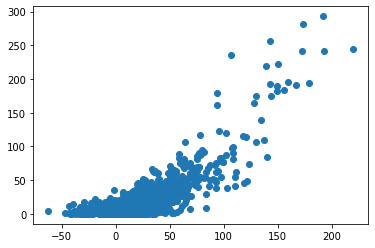

In [53]:
plt.scatter(y_pred,y_true)

In [54]:
print("RMSE : " + str(np.sqrt(metrics.mean_squared_error(y_true,y_pred))))
print("MAE : " + str(metrics.mean_absolute_error(y_true,y_pred)))
print("R2 score : " + str(metrics.r2_score(y_true,y_pred)))
corr, _ = pearsonr(y_true, y_pred)
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(y_true, y_pred)
print('Spearmans correlation: %.3f' % corr)


RMSE : 17.642015647304365
MAE : 11.951201686282083
R2 score : 0.6435278283011503
Pearsons correlation: 0.825
Spearmans correlation: 0.690


### Support Vector Regressor with gridsearch hyperparameter tuning

In [99]:


parameters = {'C':[1e-3,1e-2,1e-1,1],
              'tol':[1e-4,1e-3,1e-2,1e-1,1]}


svr_model = LinearSVR()
x_train = x.iloc[X_1_indices]
y_train = Y.loc[X_1_indices]['lymphocyte']

# x_train.shape
# svr_model.fit(x_train,y_train)
clf = GridSearchCV(svr_model, parameters, n_jobs=-1,scoring='r2')
clf.fit(x_train,y_train)

clf.best_score_
clf.best_params_


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


{'C': 0.001, 'tol': 0.01}

In [100]:
svr_model = LinearSVR(C=0.001,tol=0.01)
svr_model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVR(C=0.001, tol=0.01)

In [101]:
y_pred_svr = svr_model.predict(x.iloc[X_3_indices])
y_true_svr = Y.loc[X_3_indices]['lymphocyte']

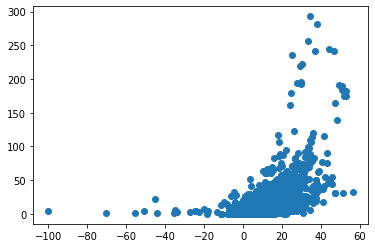

In [102]:
plt.scatter(y_pred_svr,y_true_svr)

In [103]:
print("RMSE : " + str(np.sqrt(metrics.mean_squared_error(y_true_svr,y_pred_svr))))
print("MAE : " + str(metrics.mean_absolute_error(y_true_svr,y_pred_svr)))
print("R2 score : " + str(metrics.r2_score(y_true_svr,y_pred_svr)))
corr, _ = pearsonr(y_true_svr, y_pred_svr)
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(y_true_svr, y_pred_svr)
print('Spearmans correlation: %.3f' % corr)


RMSE : 25.656956123297245
MAE : 12.081058801168789
R2 score : 0.2460553061418682
Pearsons correlation: 0.556
Spearmans correlation: 0.662


### CNN

In [84]:
from tensorflow import keras
import tensorflow as tf
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential
from keras.utils import np_utils
from keras import backend as K


In [85]:
def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [86]:
  tf.random.set_seed(0)

In [87]:
def initialize_cnn() :
  model = None
  model = Sequential()
  model.add(Convolution2D(64, (3, 3), input_shape = (256, 256, 3), activation = 'relu', data_format='channels_last'))
  model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
  model.add(BatchNormalization(axis = -1))
  model.add(Dropout(0.2))
  model.add(Convolution2D(64, (3, 3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
  model.add(BatchNormalization(axis = -1))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(activation = 'relu', units=512))
  model.add(BatchNormalization(axis = -1))
  model.add(Dropout(0.2))
  model.add(Dense(activation = 'relu', units=256))
  model.add(BatchNormalization(axis = -1))
  model.add(Dropout(0.2))
  model.add(Dense(activation = 'linear', units=1))
  model.compile(optimizer = 'Adam', loss = 'mse', metrics = [coeff_determination])
  print(model.summary())
  return model

In [88]:
def fit_model(model,x_train,y_train,x_test):
  history = model.fit(x_train, 
                         y_train, 
                         verbose = 1, 
                         epochs = 25,      
                         validation_split = 0.2
                     )

  scores = model.evaluate(x_test, y_test,verbose=1)

  print("Scores : ",scores)

  y_pred = model.predict(x_test)


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()


  return y_pred



In [89]:
def evaluate_model(model,y_pred,y_test) :
  
  plt.scatter(y_pred,y_test)
  plt.show()

  print("RMSE : " + str(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))
  print("MAE : " + str(metrics.mean_absolute_error(y_test,y_pred)))
  print("R2 score : " + str(metrics.r2_score(y_test,y_pred)))
  pcorr, _ = pearsonr(y_test, y_pred)
  print('Pearsons correlation: %.3f' % pcorr)

  scorr, _ = spearmanr(y_test, y_pred)
  print('Spearmans correlation: %.3f' % scorr)

  return [np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.mean_absolute_error(y_test,y_pred),metrics.r2_score(y_test,y_pred),pcorr,scorr]
    

###CV1 -> Use Fold2 + Flod3 for training and Fold 1 for testing

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_12 (Bat  (None, 127, 127, 64)     256       
 chNormalization)                                                
                                                                 
 dropout_12 (Dropout)        (None, 127, 127, 64)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)      

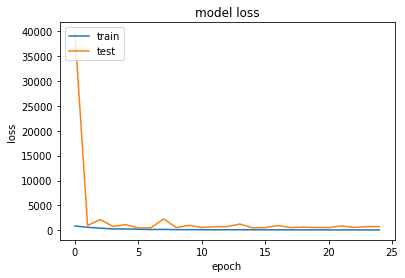

In [90]:
## Define x_train and y_train
x_train = X[X_2_indices + X_3_indices]
y_train = Y.loc[X_2_indices].append(Y.loc[X_3_indices])['lymphocyte']

x_test = X[X_1_indices]
y_test = Y.loc[X_1_indices]['lymphocyte']

model = initialize_cnn()

y_pred = fit_model(model, x_train, y_train, x_test)


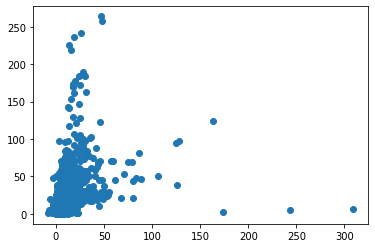

RMSE : 29.019237821156914
MAE : 13.989537474976075
R2 score : -0.018946687205738
Pearsons correlation: 0.367
Spearmans correlation: 0.723


In [91]:
cnncv1 = evaluate_model(model,y_pred,y_test)

### CV2

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_16 (Bat  (None, 127, 127, 64)     256       
 chNormalization)                                                
                                                                 
 dropout_16 (Dropout)        (None, 127, 127, 64)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 62, 62, 64)      

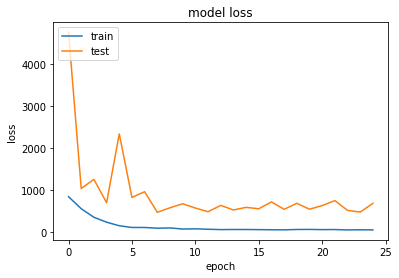

In [92]:
## Define x_train and y_train
x_train = X[X_1_indices + X_3_indices]
y_train = Y.loc[X_1_indices].append(Y.loc[X_3_indices])['lymphocyte']

x_test = X[X_2_indices]
y_test = Y.loc[X_2_indices]['lymphocyte']

model = initialize_cnn()

y_pred = fit_model(model, x_train, y_train, x_test)


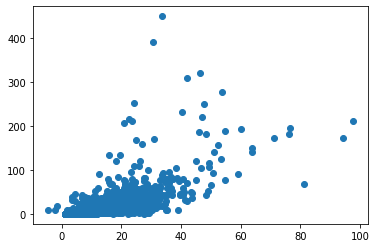

RMSE : 27.69045136152787
MAE : 11.476896861701064
R2 score : 0.2936044567472913
Pearsons correlation: 0.670
Spearmans correlation: 0.778


In [93]:
cnncv2 = evaluate_model(model,y_pred,y_test)

## CV3

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 batch_normalization_20 (Bat  (None, 127, 127, 64)     256       
 chNormalization)                                                
                                                                 
 dropout_20 (Dropout)        (None, 127, 127, 64)      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 62, 62, 64)      

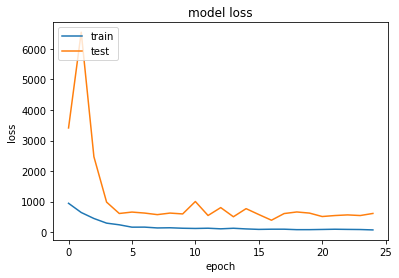

In [94]:
## Define x_train and y_train
x_train = X[X_1_indices + X_2_indices]
y_train = Y.loc[X_1_indices].append(Y.loc[X_2_indices])['lymphocyte']

x_test = X[X_3_indices]
y_test = Y.loc[X_3_indices]['lymphocyte']

model = initialize_cnn()

y_pred = fit_model(model, x_train, y_train, x_test)


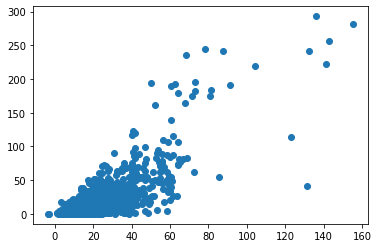

RMSE : 19.46946224194305
MAE : 11.191236939448029
R2 score : 0.5658526659520505
Pearsons correlation: 0.798
Spearmans correlation: 0.786


In [95]:
cnncv3 = evaluate_model(model,y_pred,y_test)

### CV1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 127, 127, 64)     256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 127, 127, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0

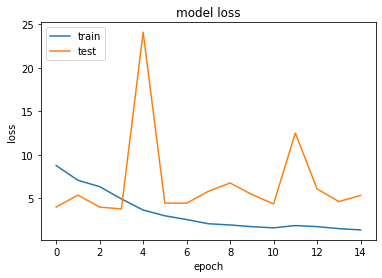

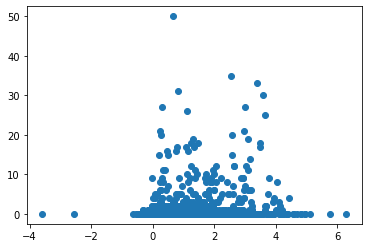

RMSE : 3.4763604582412415
MAE : 1.7261643513391751
R2 score : -0.01733599916169193
Pearsons correlation: 0.126
Spearmans correlation: 0.088
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 127, 127, 64)     256       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 127, 127, 64)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 

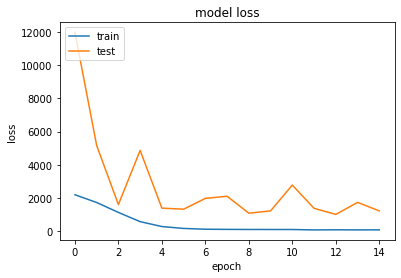

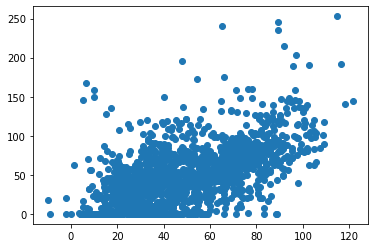

RMSE : 30.538691767223842
MAE : 22.341376599783374
R2 score : 0.34133679653686766
Pearsons correlation: 0.589
Spearmans correlation: 0.600
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 127, 127, 64)     256       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 127, 127, 64)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 6

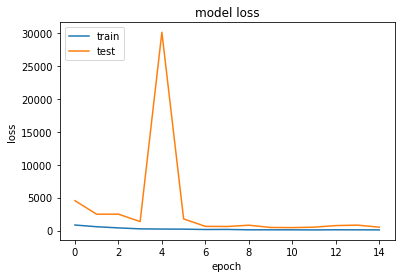

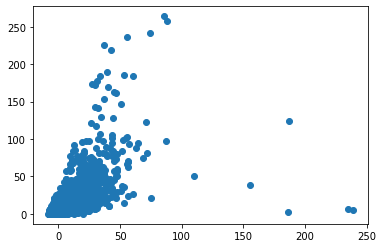

RMSE : 25.53249054126939
MAE : 13.994098514584886
R2 score : 0.21120196926802282
Pearsons correlation: 0.582
Spearmans correlation: 0.800
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_12 (Bat  (None, 127, 127, 64)     256       
 chNormalization)                                                
                                                                 
 dropout_12 (Dropout)        (None, 127, 127, 64)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64

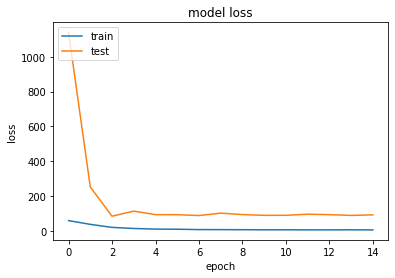

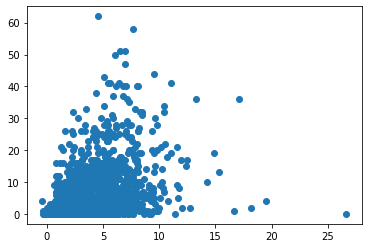

RMSE : 7.676593411565596
MAE : 4.378040167060939
R2 score : 0.12447162990145222
Pearsons correlation: 0.468
Spearmans correlation: 0.630
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_16 (Bat  (None, 127, 127, 64)     256       
 chNormalization)                                                
                                                                 
 dropout_16 (Dropout)        (None, 127, 127, 64)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 64)

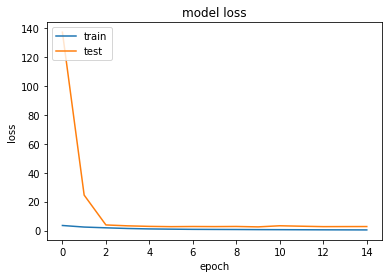

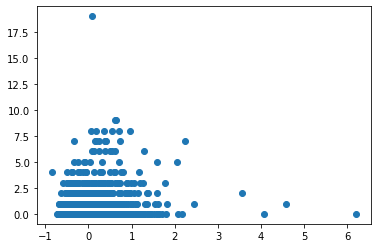

RMSE : 1.4621836002458966
MAE : 0.824462222560101
R2 score : -0.21001099952252233
Pearsons correlation: 0.205
Spearmans correlation: 0.240
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 batch_normalization_20 (Bat  (None, 127, 127, 64)     256       
 chNormalization)                                                
                                                                 
 dropout_20 (Dropout)        (None, 127, 127, 64)      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 6

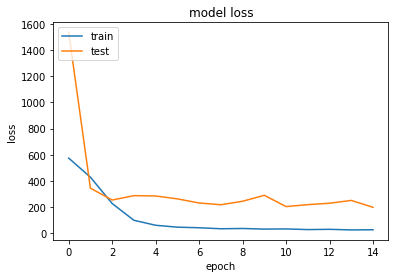

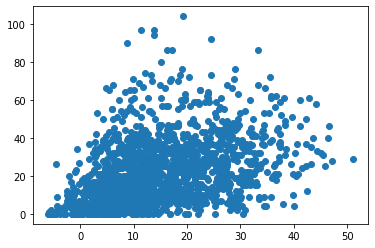

RMSE : 17.537683259161444
MAE : 12.644375348465951
R2 score : -0.049864756244939246
Pearsons correlation: 0.419
Spearmans correlation: 0.475


In [16]:

metricsCV1 = []

for cell in Y.columns:
    x_train = X[X_2_indices + X_3_indices]
    y_train = Y.loc[X_2_indices].append(Y.loc[X_3_indices])[cell]

    x_test = X[X_1_indices]
    y_test = Y.loc[X_1_indices][cell]

    model = initialize_cnn()

    print("Fitting CNN model for " + cell + "on CV1")
    y_pred = fit_model(model, x_train, y_train, x_test)

    metricsvals = evaluate_model(model,y_pred,y_test)

    metricsCV1.append(metricsvals)
        


[[3.4763604582412415,
  1.7261643513391751,
  -0.01733599916169193,
  array([0.12629842756953955], dtype=object),
  0.08754377701169144],
 [30.538691767223842,
  22.341376599783374,
  0.34133679653686766,
  array([0.5888097235703297], dtype=object),
  0.5995779892381875],
 [25.53249054126939,
  13.994098514584886,
  0.21120196926802282,
  array([0.5817562868511196], dtype=object),
  0.7997269112851358],
 [7.676593411565596,
  4.378040167060939,
  0.12447162990145222,
  array([0.46784469638479703], dtype=object),
  0.6297887807369905],
 [1.4621836002458966,
  0.824462222560101,
  -0.21001099952252233,
  array([0.20460369669629272], dtype=object),
  0.23975340584890376],
 [17.537683259161444,
  12.644375348465951,
  -0.049864756244939246,
  array([0.4194778953722813], dtype=object),
  0.4750859427187105]]

### CV2

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 batch_normalization_24 (Bat  (None, 127, 127, 64)     256       
 chNormalization)                                                
                                                                 
 dropout_24 (Dropout)        (None, 127, 127, 64)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)      

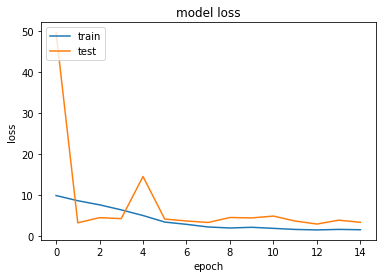

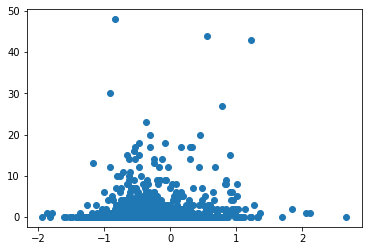

RMSE : 3.428363745596833
MAE : 1.447740110983037
R2 score : -0.1735097789432325
Pearsons correlation: 0.113
Spearmans correlation: 0.102
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 batch_normalization_28 (Bat  (None, 127, 127, 64)     256       
 chNormalization)                                                
                                                                 
 dropout_28 (Dropout)        (None, 127, 127, 64)      0         
                                                                 
 conv2d_15 (Conv2D)          (None, 125, 125, 64)

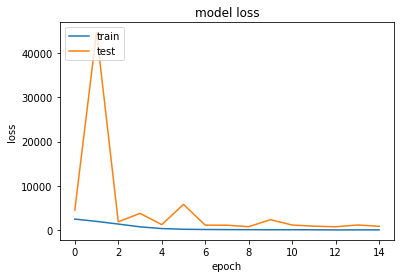

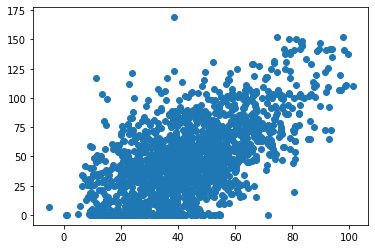

RMSE : 25.935928766485645
MAE : 20.577675240302618
R2 score : 0.39370209972407
Pearsons correlation: 0.637
Spearmans correlation: 0.605
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 batch_normalization_32 (Bat  (None, 127, 127, 64)     256       
 chNormalization)                                                
                                                                 
 dropout_32 (Dropout)        (None, 127, 127, 64)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 125, 125, 64) 

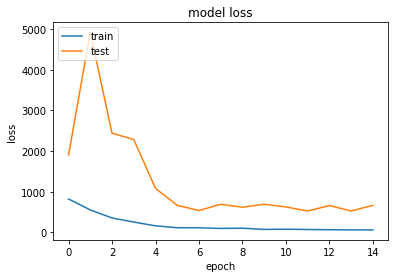

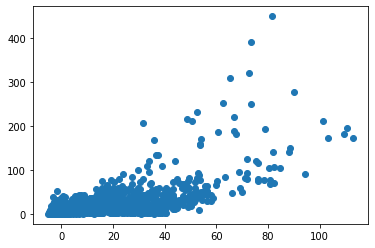

RMSE : 25.075613026983238
MAE : 11.668621901492948
R2 score : 0.42071671285946366
Pearsons correlation: 0.690
Spearmans correlation: 0.748
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 batch_normalization_36 (Bat  (None, 127, 127, 64)     256       
 chNormalization)                                                
                                                                 
 dropout_36 (Dropout)        (None, 127, 127, 64)      0         
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 6

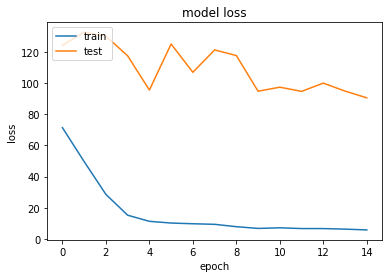

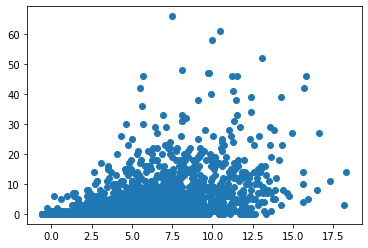

RMSE : 7.049461777625605
MAE : 5.027477432972087
R2 score : 0.12362082103144922
Pearsons correlation: 0.410
Spearmans correlation: 0.468
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 batch_normalization_40 (Bat  (None, 127, 127, 64)     256       
 chNormalization)                                                
                                                                 
 dropout_40 (Dropout)        (None, 127, 127, 64)      0         
                                                                 
 conv2d_21 (Conv2D)          (None, 125, 125, 64

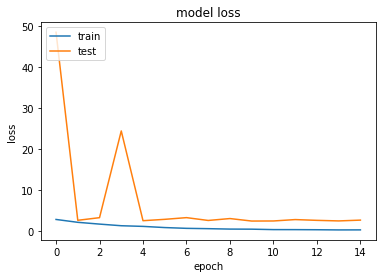

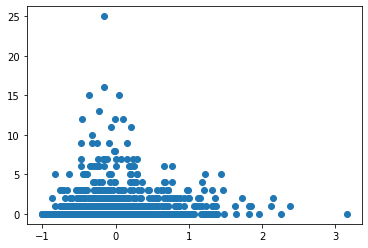

RMSE : 1.8439515514581652
MAE : 0.9560108099202984
R2 score : -0.23923644556756174
Pearsons correlation: 0.125
Spearmans correlation: 0.251
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 batch_normalization_44 (Bat  (None, 127, 127, 64)     256       
 chNormalization)                                                
                                                                 
 dropout_44 (Dropout)        (None, 127, 127, 64)      0         
                                                                 
 conv2d_23 (Conv2D)          (None, 125, 125,

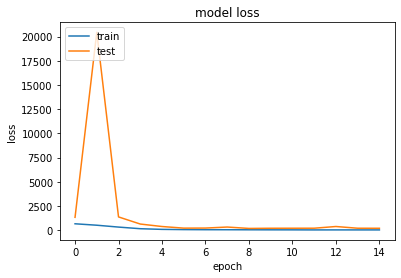

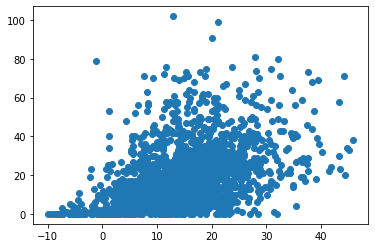

RMSE : 15.421186245161222
MAE : 10.82476011189238
R2 score : 0.09584434749132953
Pearsons correlation: 0.451
Spearmans correlation: 0.491


In [18]:


metricsCV2 = []

for cell in Y.columns:
    x_train = X[X_1_indices + X_3_indices]
    y_train = Y.loc[X_1_indices].append(Y.loc[X_3_indices])[cell]

    x_test = X[X_2_indices]
    y_test = Y.loc[X_2_indices][cell]

    model = initialize_cnn()

    print("Fitting CNN model for " + cell + "on CV2")
    y_pred = fit_model(model, x_train, y_train, x_test)

    metricsvals = evaluate_model(model,y_pred,y_test)

    metricsCV2.append(metricsvals)
        

### CV3

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 batch_normalization_48 (Bat  (None, 127, 127, 64)     256       
 chNormalization)                                                
                                                                 
 dropout_48 (Dropout)        (None, 127, 127, 64)      0         
                                                                 
 conv2d_25 (Conv2D)          (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 62, 62, 64)     

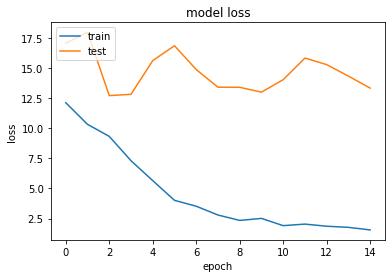

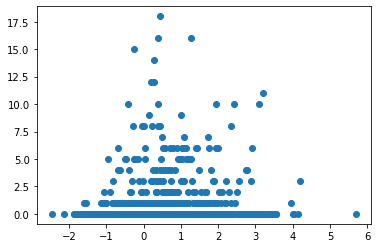

RMSE : 1.816748520855132
MAE : 1.063177939872744
R2 score : -0.24535423457999683
Pearsons correlation: 0.115
Spearmans correlation: 0.149
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 batch_normalization_52 (Bat  (None, 127, 127, 64)     256       
 chNormalization)                                                
                                                                 
 dropout_52 (Dropout)        (None, 127, 127, 64)      0         
                                                                 
 conv2d_27 (Conv2D)          (None, 125, 125, 6

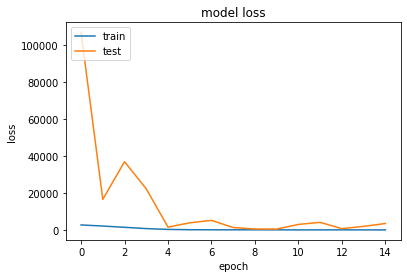

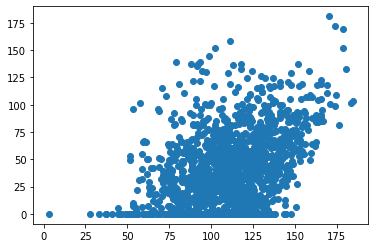

RMSE : 79.14439763792193
MAE : 72.9976662794749
R2 score : -4.389730868856549
Pearsons correlation: 0.385
Spearmans correlation: 0.355
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 batch_normalization_56 (Bat  (None, 127, 127, 64)     256       
 chNormalization)                                                
                                                                 
 dropout_56 (Dropout)        (None, 127, 127, 64)      0         
                                                                 
 conv2d_29 (Conv2D)          (None, 125, 125, 64) 

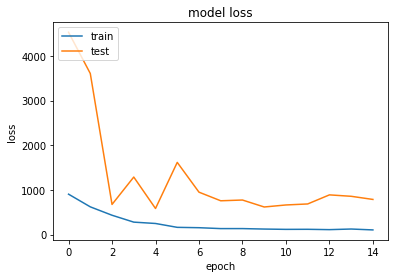

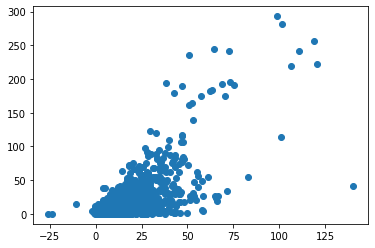

RMSE : 22.436480149436235
MAE : 13.177121343341335
R2 score : 0.42344774232452786
Pearsons correlation: 0.699
Spearmans correlation: 0.594
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 batch_normalization_60 (Bat  (None, 127, 127, 64)     256       
 chNormalization)                                                
                                                                 
 dropout_60 (Dropout)        (None, 127, 127, 64)      0         
                                                                 
 conv2d_31 (Conv2D)          (None, 125, 125, 

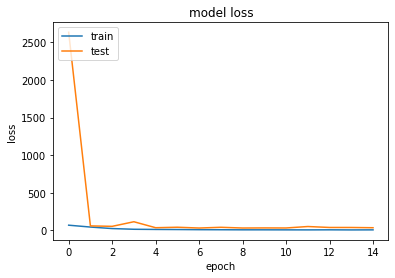

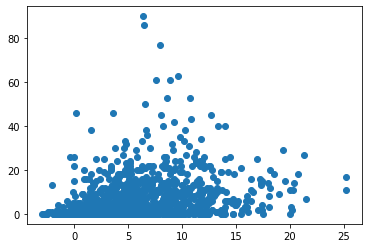

RMSE : 8.128408137540783
MAE : 4.65744982177475
R2 score : 0.11145751009416505
Pearsons correlation: 0.366
Spearmans correlation: 0.521
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 batch_normalization_64 (Bat  (None, 127, 127, 64)     256       
 chNormalization)                                                
                                                                 
 dropout_64 (Dropout)        (None, 127, 127, 64)      0         
                                                                 
 conv2d_33 (Conv2D)          (None, 125, 125, 64)

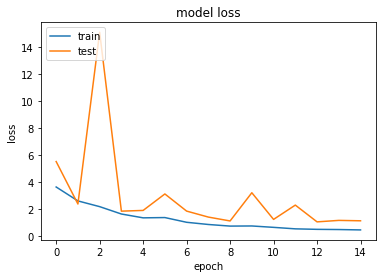

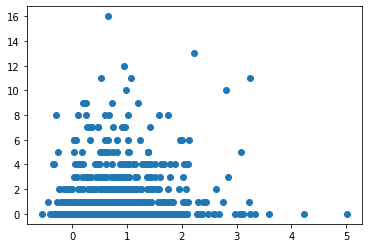

RMSE : 1.6040404013616294
MAE : 0.9498789796665941
R2 score : -0.01697127201379023
Pearsons correlation: 0.150
Spearmans correlation: 0.145
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 batch_normalization_68 (Bat  (None, 127, 127, 64)     256       
 chNormalization)                                                
                                                                 
 dropout_68 (Dropout)        (None, 127, 127, 64)      0         
                                                                 
 conv2d_35 (Conv2D)          (None, 125, 125,

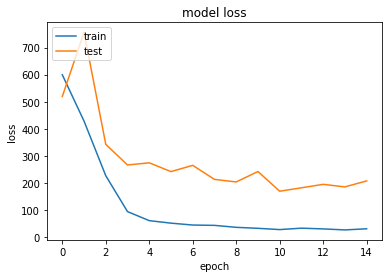

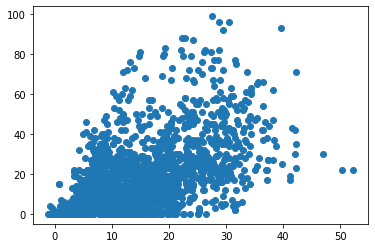

RMSE : 15.890754851134593
MAE : 11.30614090321669
R2 score : 0.2263988132373086
Pearsons correlation: 0.504
Spearmans correlation: 0.501


In [19]:
metricsCV3 = []

for cell in Y.columns:
    x_train = X[X_1_indices + X_2_indices]
    y_train = Y.loc[X_1_indices].append(Y.loc[X_2_indices])[cell]

    x_test = X[X_3_indices]
    y_test = Y.loc[X_3_indices][cell]

    model = initialize_cnn()

    print("Fitting CNN model for " + cell + "on CV3")
    y_pred = fit_model(model, x_train, y_train, x_test)

    metricsvals = evaluate_model(model,y_pred,y_test)

    metricsCV1.append(metricsvals)
        

Model Performances


Linear Regression (R2 Score): 0.6435278283011503 <br>

SVR (R2 Score): 0.2460553061418682 <br>

CNN (CV1): -0.018946687205738 <br>

CNN (CV2): 0.2936044567472913 <br>

CNN (CV3): 0.42344774232452786 <br>